In [24]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [25]:
finance_df = pd.read_csv("Financial_stock_data.csv")
auto_df = pd.read_csv("../Automotive/final_auto_stock_data.csv")
finance_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,WD,Finance,Mortgage,47.700001,47.919998,47.259998,47.320000,181300
1,2018-01-03,WD,Finance,Mortgage,47.230000,47.230000,46.090000,46.130001,134800
2,2018-01-04,WD,Finance,Mortgage,46.189999,46.810001,46.090000,46.099998,140200
3,2018-01-05,WD,Finance,Mortgage,46.110001,48.060001,45.349998,47.980000,336900
4,2018-01-08,WD,Finance,Mortgage,48.160000,48.880001,47.369999,47.820000,310100
...,...,...,...,...,...,...,...,...,...
29072,2023-11-30,COF,Finance,Credit Services,110.800003,111.970001,110.180000,111.660004,2439300
29073,2023-12-01,COF,Finance,Credit Services,111.339996,115.139999,111.339996,113.930000,3421900
29074,2023-12-04,COF,Finance,Credit Services,112.989998,116.019997,112.639999,114.940002,3594000
29075,2023-12-05,COF,Finance,Credit Services,114.440002,116.309998,113.669998,115.320000,3572400


In [19]:
auto_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.6700,43.190,43.60,860740.0
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.8500,43.200,43.39,1152481.0
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.9500,43.300,43.74,1164240.0
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.8800,43.030,43.53,922916.0
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.8600,43.280,43.55,1254075.0
...,...,...,...,...,...,...,...,...,...
28602,2023-11-28,INTC,Automobiles,Semiconductors,43.69,44.3827,43.660,44.23,24548874.0
28603,2023-11-29,INTC,Automobiles,Semiconductors,44.60,45.3400,44.600,44.94,38982026.0
28604,2023-11-30,INTC,Automobiles,Semiconductors,44.65,45.0900,44.410,44.70,46262971.0
28605,2023-12-01,INTC,Automobiles,Semiconductors,44.36,44.3600,42.860,43.74,43928371.0


In [26]:
merged_df = pd.merge(finance_df, auto_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")
merged_df.sample(10)

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
48040,2021-02-26,GM,Automobiles,Auto Manufacturers,50.870000,51.730000,49.920000,51.330000,16821224.0
10499,2021-04-22,PRU,Finance,Insurance,97.449997,97.760002,96.300003,96.739998,1888500.0
16689,2022-03-03,BLK,Finance,Asset Management,746.969971,752.500000,729.570007,737.710022,694400.0
54715,2018-01-22,AMD,Automobiles,Semiconductors,12.610000,12.740000,12.370000,12.650000,34419605.0
28595,2022-01-06,COF,Finance,Credit Services,149.070007,151.289993,146.199997,150.729996,2622200.0
19402,2021-02-02,TROW,Finance,Asset Management,157.250000,158.020004,156.300003,157.410004,1244800.0
29165,2018-05-09,CPRT,Automobiles,Auto & Truck Dealerships,53.290000,53.890000,52.950000,53.800000,1359666.0
57410,2022-11-01,INTC,Automobiles,Semiconductors,28.800000,28.850000,27.890000,28.300000,44418730.0
49437,2020-10-12,F,Automobiles,Auto Manufacturers,7.360000,7.865000,7.330000,7.670000,97692932.0
33909,2019-06-07,LAD,Automobiles,Auto & Truck Dealerships,117.700000,118.620000,116.460000,116.580000,176906.0


In [27]:
ls1 = []
ls2 = []
ls3 = []
ticker = []
sector = []
industry = []
analysis_df = {}
for symbols in merged_df["Ticker"].unique():
  # Find the dictionary with the earliest date
  con_df = merged_df.loc[merged_df["Ticker"] == symbols]

  # Convert the "date" column to datetime
  con_df["Date"] = pd.to_datetime(con_df["Date"])

  # Find the row with the earliest date
  earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]
  latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]
  percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

  ticker.append(symbols)
  sector.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
  industry.append(con_df.loc[con_df["Date"].idxmax(), "Industry"])
  ls1.append(earliest_date_row)
  ls2.append(latest_date_row)
  ls3.append(percent_change_price)


analysis_df = pd.DataFrame({
    "Ticker" : ticker,
    "Sector" : sector,
    "Industry" : industry,
    "Initial Open" : ls1,
    "Final close" : ls2,
    "Total Change in Percent" : ls3

})
analysis_df

,Ticker,Sector,Industry,Initial Open,Final close,Total Change in Percent
0,WD,Finance,Mortgage,47.700001,91.019997,90.817600
1,PFSI,Finance,Mortgage,22.350000,80.000000,257.941828
2,LDI,Finance,Mortgage,14.000000,2.050000,-85.357143
3,GHI,Finance,Mortgage,18.150000,16.799999,-7.438019
4,COOP,Finance,Mortgage,10.320000,62.450001,505.135684
5,AFL,Finance,Insurance,44.180000,81.730003,84.993216
6,HIG,Finance,Insurance,56.340000,78.389999,39.137379
7,PRU,Finance,Insurance,115.169998,97.930000,-14.969174
8,ALL,Finance,Insurance,104.070000,138.490005,33.073898
9,PGR,Finance,Insurance,56.459999,161.490005,186.025519


In [28]:
#idxmax returns the index of the max value
best_performer_df = analysis_df.iloc[analysis_df.groupby("Sector")["Total Change in Percent"].idxmax()].reset_index(drop = True)
best_performer_df

,Ticker,Sector,Industry,Initial Open,Final close,Total Change in Percent
0,AMD,Automobiles,Semiconductors,10.42,118.570000,1037.907869
1,COOP,Finance,Mortgage,10.32,62.450001,505.135684


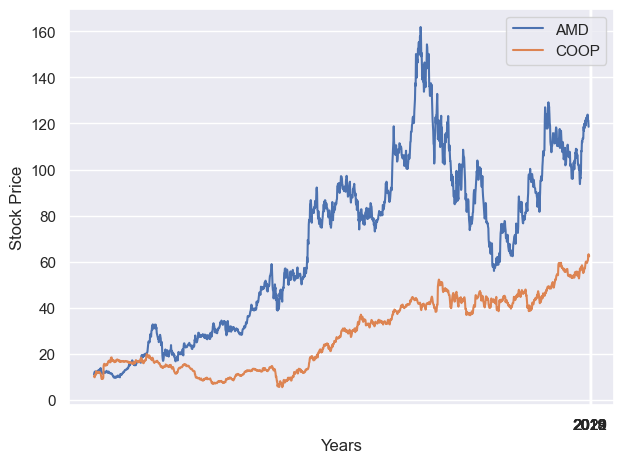

In [29]:
top_performers_by_sector = best_performer_df["Ticker"]
for ticker in top_performers_by_sector:

  line_df = merged_df.loc[merged_df["Ticker"] == ticker, ["Date", "Close"]]
  #line_df["Year"] = line_df["Date"].str.split("-").str[0].str[:4]
  sns.set_theme()
  sns.lineplot(data = line_df, x = "Date", y = "Close", label = ticker)

line_df.set_index("Date", inplace=True)
line_df.index = pd.to_datetime(line_df.index)
ticks_to_use = line_df.index[::251]

# Set format of labels (note year not excluded as requested)
labels = [ i.strftime("%Y") for i in ticks_to_use ]
plt.xticks(labels)
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.tight_layout()
plt.show()